In [1]:
# import data

import pandas as pd

df = pd.read_csv('../Data/1ADQ.tsv', sep='\t')
df.columns = ['Ag', 'AbSeq', 'Energy', 'AgSeq']
df = df[['Ag', 'AgSeq', 'AbSeq', 'Energy']]


In [2]:
# filtering 

df2 = df[['Ag', 'AbSeq']].groupby(by='Ag', as_index=False).count()
x1 = df.shape[0]
x2 = df2.shape[0]

df2 = df2[df2.AbSeq>=5000].sort_values(by='Ag').reset_index(drop=True)
df1 = df[df.Ag.isin(df2.Ag)].sort_values(by=['Ag', 'AbSeq']).reset_index(drop=True)

print(x2, '->', df2.shape[0])
print(x1, '->', df1.shape[0])


12598 -> 8337
47142745 -> 47091602


In [3]:
# split

from sklearn.model_selection import train_test_split

df2_train, df2_val = train_test_split(df2, test_size=0.3, random_state=0)
df2_val, df2_test = train_test_split(df2_val, test_size=1/3, random_state=0)

print(df2_train.shape[0], '/', df2_val.shape[0], '/', df2_test.shape[0])

df1_train = df1[df1.Ag.isin(df2_train.Ag)].reset_index(drop=True)
df1_val = df1[df1.Ag.isin(df2_val.Ag)].reset_index(drop=True)
df1_test = df1[df1.Ag.isin(df2_test.Ag)].reset_index(drop=True)


5835 / 1668 / 834


In [4]:
# threshold

th = df1_train.Energy.quantile(0.5)

print('Energy < %s : binder (label 1)' %th)
print('Energy >= %s : non-binder (label 0)' %th)

df1_train['BindClass'] = df1_train.apply(lambda x: 1 if x.Energy<th else 0, axis=1)
print(df1_train.shape[0], '/', df1_train.BindClass.mean())

df1_val['BindClass'] = df1_val.apply(lambda x: 1 if x.Energy<th else 0, axis=1)
print(df1_val.shape[0], '/', df1_val.BindClass.mean())

df1_test['BindClass'] = df1_test.apply(lambda x: 1 if x.Energy<th else 0, axis=1)
print(df1_test.shape[0], '/', df1_test.BindClass.mean())


Energy < -87.99 : binder (label 1)
Energy >= -87.99 : non-binder (label 0)
32960553 / 0.4999184934791598
9424812 / 0.49511183883561816
4706237 / 0.5007712106296389


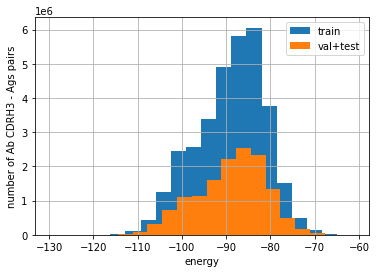

In [9]:
ax = df1_train.Energy.hist(bins=20, label='train')
ax = df1_val.append(df1_test).Energy.hist(bins=20, label='val+test')

ax.set_xlabel("energy")
ax.set_ylabel("number of Ab CDRH3 - Ags pairs")
ax.legend()


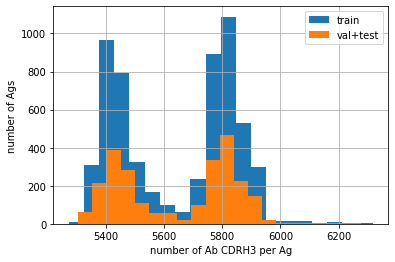

In [10]:
ax = df1_train.groupby(by='Ag', as_index=False).count().AbSeq.hist(bins=20, label='train')
ax = df1_val.append(df1_test).groupby(by='Ag', as_index=False).count().AbSeq.hist(bins=20, label='val+test')
ax.set_xlabel("number of Ab CDRH3 per Ag")
ax.set_ylabel("number of Ags")
ax.legend()


In [7]:
print(df1_train.append(df1_val.append(df1_test)).groupby(by='Ag', as_index=False).count().AbSeq.min())
print(df1_train.append(df1_val.append(df1_test)).groupby(by='Ag', as_index=False).count().AbSeq.max())


5273
6317


In [8]:
df1_train.to_csv('../Data/1ADQ_train.tsv', sep='\t', index=None)
df1_val.to_csv('../Data/1ADQ_val.tsv', sep='\t', index=None)
df1_test.to_csv('../Data/1ADQ_test.tsv', sep='\t', index=None)
